<h1> Machine Learning Notebook

<h2> ToC

* [1. K-Means Analysis](#k_means)
* [2. t-SNE Visualisation](#t_sne)
* [3. DBScan](#dbscan)
* [4. Cluster Characteristics](#characteristics)

In [1]:
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
filepath = '/Users/efkanturedi/Corteze/Python_output_folders/Ecommerce/final_df.csv'
filepath2 = '/Users/efkanturedi/Corteze/Python_output_folders/Ecommerce/customer_df.csv'
df = pd.read_csv(filepath)
customer_df = pd.read_csv(filepath2)

In [3]:
df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12,pca_comp13,pca_comp14
0,0000366f3b9a7992bf8c76cfdf3221e2,SP,-0.109858,credit_card,['bed_bath_table'],0.665746,-0.466776,-0.383089,-0.159013,0.839509,0.353340,0.143144,0.060529,0.029413,0.013355,0.061828,0.012796,0.000364,-0.010701,-0.005418,-0.012528,-0.013239,-0.007476,-0.007169
1,0000b849f77a49e4a4ce2b2a4ca5be3f,SP,-0.287183,credit_card,['health_beauty'],-0.108041,-0.602544,-0.422063,-0.148522,-0.516282,0.752582,0.155430,0.036670,0.057760,0.032848,0.081007,0.014292,0.000538,-0.012238,-0.007411,-0.018432,-0.010617,-0.011580,-0.010961
2,0000f46a3911fa3c0805444483337064,SC,-0.195931,credit_card,['stationery'],-0.881828,-0.275749,-1.131777,-0.603591,-0.026564,-0.055602,-0.051815,-0.020349,-0.044622,-0.029732,-0.124048,-0.042254,-0.005628,0.038833,0.033797,0.097506,0.113129,0.210115,0.906985
3,0000f6ccb0745a6a4b88665a16c9f078,PA,-0.261785,credit_card,['telephony'],-0.108041,-0.260745,3.540951,-0.566082,-0.035464,-0.081425,-0.083522,-0.029464,-0.084712,-0.069323,-0.442079,0.836790,-0.006640,-0.135791,-0.068275,-0.093893,-0.059508,-0.051627,-0.035533
4,0004aac84e0df4da2b147fca70cf8255,SP,-0.024851,credit_card,['telephony'],0.665746,-0.287825,-0.412540,-0.316436,-0.035464,-0.081425,-0.083522,-0.029464,-0.084712,-0.069323,-0.442079,0.836790,-0.006640,-0.135791,-0.068275,-0.093893,-0.059508,-0.051627,-0.035533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93082,fffcf5a5ff07b0908bd4e2dbc735a684,PE,6.062667,credit_card,['health_beauty'],0.665746,17.297269,2.285060,2.371883,-0.516282,0.752582,0.155430,0.036670,0.057760,0.032848,0.081007,0.014292,0.000538,-0.012238,-0.007411,-0.018432,-0.010617,-0.011580,-0.010961
93083,fffea47cd6d3cc0a88bd621562a9d061,BA,-0.198466,credit_card,['baby'],-0.108041,-0.185359,1.598276,1.781084,-0.023592,-0.060871,-0.058423,-0.025360,-0.050934,-0.033202,-0.160597,-0.067395,-0.017847,0.080042,0.036300,0.194933,0.863651,-0.357254,-0.128025
93084,ffff371b4d645b6ecea244b27531430a,MT,-0.155368,credit_card,['auto'],0.665746,-0.080330,1.666540,-2.297563,-0.032290,-0.076097,-0.075692,-0.030864,-0.074438,-0.057935,-0.321435,-0.338051,0.720325,-0.397126,-0.144158,-0.134349,-0.079277,-0.064151,-0.043227
93085,ffff5962728ec6157033ef9805bacc48,ES,-0.122549,credit_card,['watches_gifts'],0.665746,-0.221954,0.011335,1.112399,-0.050669,-0.124787,-0.148903,-0.103327,-0.320659,-0.743791,0.470884,0.046081,0.001861,-0.031367,-0.019874,-0.037479,-0.027235,-0.027367,-0.020869


In [4]:
n = len(df)
index_rand_selection = sample(list(range(0,n)),50000)

In [5]:
df = df.iloc[index_rand_selection]
customer_df = customer_df.iloc[index_rand_selection]

In [6]:
df_clean = df.drop(columns=['customer_unique_id','customer_state','payment_type','product_category_name'])
df_clean.reset_index(inplace=True,drop=True)
customer_df.reset_index(inplace=True,drop=True)

In [7]:
df_clean

,payment_value,review_score,freight_value,geolocation_lat,geolocation_lng,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12,pca_comp13,pca_comp14
0,-0.202918,-0.881828,-0.294778,-0.326052,0.670738,-0.021280,-0.147697,-0.259094,-0.609649,0.636347,0.114164,0.192966,0.032189,0.001701,-0.026269,-0.023018,-0.024256,-0.018974,-0.016064,-0.013034
1,-0.014525,0.665746,0.819912,-1.164186,-0.580726,-0.030344,-0.072421,-0.070584,-0.033454,-0.057046,-0.039235,-0.221836,-0.119100,0.013936,0.276557,0.833178,-0.307375,-0.129799,-0.089405,-0.055543
2,-0.129629,0.665746,-0.023608,-0.441350,-0.147062,-0.068082,-0.197219,-0.387882,0.758374,0.309450,0.103718,0.190797,0.023414,-0.000434,-0.021979,-0.014701,-0.023107,-0.019619,-0.020522,-0.014664
3,-0.234841,-0.881828,-0.131930,1.833995,2.243680,-0.121411,-0.434988,0.809292,0.081219,0.108903,0.052042,0.114821,0.019955,0.001579,-0.014273,-0.011574,-0.020497,-0.014459,-0.014735,-0.011937
4,-0.285328,0.665746,-0.635480,-0.302424,-0.196089,-0.020794,-0.044276,-0.038943,-0.014386,-0.030769,-0.019893,-0.076490,-0.020116,-0.000774,0.019743,0.014063,0.034662,0.032956,0.039025,0.038074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.003361,-2.429401,-0.351501,-0.402714,-0.138087,-0.032487,-0.076559,-0.074227,-0.033229,-0.075263,-0.056180,-0.315514,-0.352639,-0.692638,-0.438119,-0.114503,-0.147186,-0.099983,-0.055975,-0.048321
49996,-0.170548,0.665746,-0.406760,-0.420929,-0.053367,-0.026564,-0.055602,-0.051815,-0.020349,-0.044622,-0.029732,-0.124048,-0.042254,-0.005628,0.038833,0.033797,0.097506,0.113129,0.210115,0.906985
49997,-0.188728,-0.108041,-0.138151,-1.282285,-1.905214,-0.021280,-0.147697,-0.259094,-0.609649,0.636347,0.114164,0.192966,0.032189,0.001701,-0.026269,-0.023018,-0.024256,-0.018974,-0.016064,-0.013034
49998,-0.248382,-0.881828,-0.635480,-0.444637,-0.127784,-0.032487,-0.076559,-0.074227,-0.033229,-0.075263,-0.056180,-0.315514,-0.352639,-0.692638,-0.438119,-0.114503,-0.147186,-0.099983,-0.055975,-0.048321


In [8]:
customer_df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng
0,c688aee1174748a6896ec280c68a6c2c,RJ,81.70,credit_card,['furniture_decor'],3.0,16.70,-23.020087,-43.464409
1,8cbff6bd0d7b88c40dea8c71b9e5e28a,SC,203.57,credit_card,['garden_tools'],5.0,47.16,-27.724937,-48.542164
2,ea7ef5bb16a8ba2a4756e74032b737b7,SP,129.11,credit_card,['computers_accessories'],5.0,24.11,-23.667311,-46.782595
3,fe713394dfe3e40c4e5a6fc3ed017080,SE,61.05,credit_card,['sports_leisure'],3.0,21.15,-10.894696,-37.082278
4,f46233d0effc58fb659e2c7e3afddef3,SP,28.39,credit_card,['small_appliances'],5.0,7.39,-22.887452,-46.981517
...,...,...,...,...,...,...,...,...,...
49995,f455e02e6a81e11652c1dcf24c1b3d43,SP,215.14,credit_card,['toys'],1.0,15.15,-23.450429,-46.746178
49996,9830fd04e329c8a26fb8c8e1f421b80f,SP,102.64,credit_card,['stationery'],5.0,13.64,-23.552677,-46.402430
49997,264948e03eef857d56379613eae0381c,RS,90.88,boleto,['furniture_decor'],4.0,20.98,-28.387888,-53.916205
49998,2d79718171cd28e2c600072ff0399745,SP,52.29,credit_card,['toys'],3.0,7.39,-23.685762,-46.704374


<h2> K-means Analysis
    <a name = 'k_means'>

In [9]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

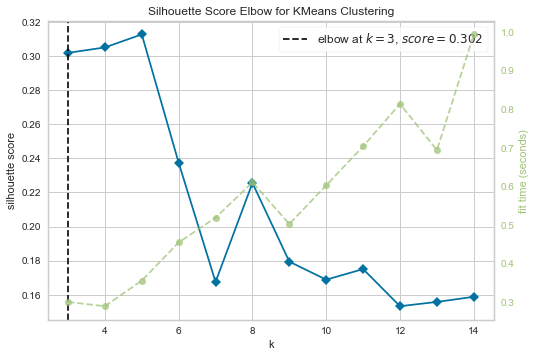

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,15),metric='silhouette')

visualizer.fit(df_clean)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

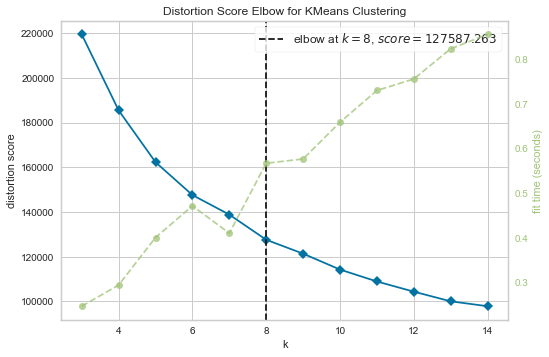

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
visualizer = KElbowVisualizer(model, k=(3,15))
visualizer.fit(df_clean)    # Fit the data to the visualizer
visualizer.poof()  

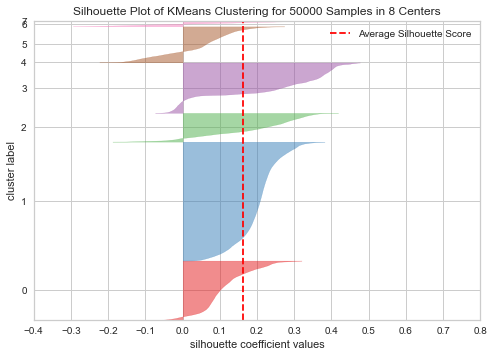

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
optimal_parameter = 8

model = KMeans(optimal_parameter)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_clean)    # Fit the data to the visualizer
visualizer.poof() 

<h2> K-Means / T-SNE Visualisation
    <a name = 't_sne'>

In [13]:
from sklearn.manifold import TSNE

In [14]:
k_means = KMeans(optimal_parameter)
k_means.fit(df_clean.copy())
clusters_k_means = k_means.labels_

In [15]:
#tsne = TSNE()
#T = tsne.fit_transform(df_clean.copy())

/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

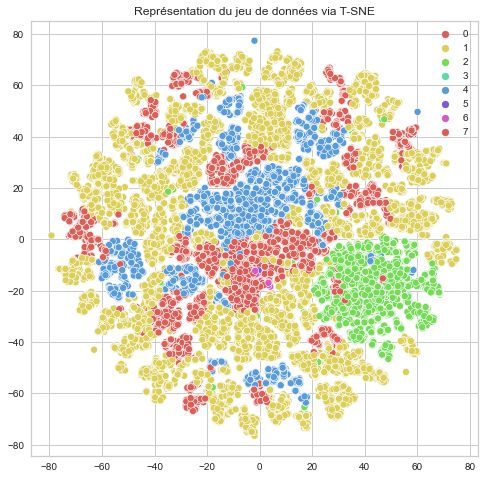

In [16]:
#plt.figure(figsize=(8,8))
#plt.title('Représentation du jeu de données via T-SNE')
#sns.scatterplot(T[:,0], T[:,1],hue=clusters_k_means,legend='full',palette="hls")

<h2> DBSCAN: Not working well
    <a name = 'dbscan'>

In [17]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [37]:
dbs = DBSCAN(eps = 1, 
             min_samples=5).fit(df_clean.copy())

In [38]:
dbs.labels_

array([ 0,  0,  0, ...,  0,  0, -1])

In [39]:
silhouette_score(df_clean,dbs.labels_)

0.3217135951863174

In [40]:
from collections import Counter

Counter(dbs.labels_)

Counter({0: 48150, -1: 1758, 1: 62, 5: 5, 2: 5, 3: 11, 4: 5, 6: 4})

In [41]:
tsne = TSNE()
T = tsne.fit_transform(df_clean.copy())

/Users/efkanturedi/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Représentation du jeu de données via T-SNE'}>

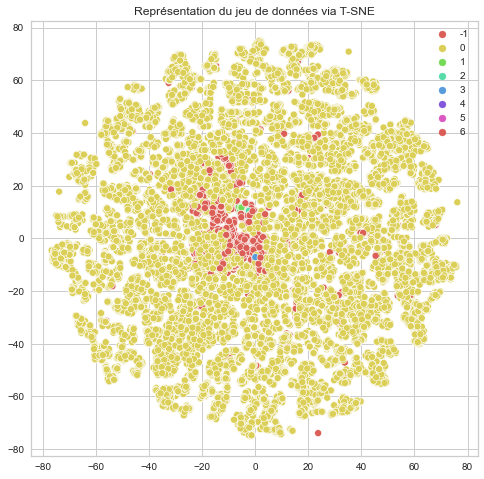

In [42]:
plt.figure(figsize=(8,8))
plt.title('Représentation du jeu de données via T-SNE')
sns.scatterplot(T[:,0], T[:,1],hue=dbs.labels_,legend='full',palette="hls")

In [97]:
cat_df_clean = df_clean.assign(Cluster=dbs.labels_)

In [98]:
cat_df_clean['Cluster'].value_counts().sort_values()

 1279        3
 1031        3
 551         3
 647         3
 711         3
         ...  
 9        1600
 19       1778
 20       1845
 3        3722
-1       15387
Name: Cluster, Length: 1295, dtype: int64

In [99]:
df.reset_index(drop=True,inplace=True)
df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng,pca_comp0,pca_comp1,pca_comp2,pca_comp3,pca_comp4,pca_comp5,pca_comp6,pca_comp7,pca_comp8,pca_comp9,pca_comp10,pca_comp11,pca_comp12,pca_comp13,pca_comp14
0,c2d5c990ca51674ef2ef7639de5a1f85,PA,0.109221,credit_card,['garden_tools'],-2.429401,3.288624,2.589248,-1.428003,-0.030344,-0.072421,-0.070584,-0.033454,-0.057046,-0.039235,-0.221836,-0.119100,0.013936,0.276557,0.833178,-0.307375,-0.129799,-0.089405,-0.055543
1,f495d4e398dcb42bb1d1da6c47a532da,BA,-0.211081,credit_card,['fashion_male_clothing'],0.665746,-0.045199,1.130664,0.927152,-0.019463,-0.041612,-0.035860,-0.012970,-0.027623,-0.018505,-0.068458,-0.018136,-0.000471,0.017053,0.012286,0.029300,0.027201,0.031115,0.029901
2,a3e15d29558f98562bae08c77650ddf5,SP,-0.170548,credit_card,['stationery'],0.665746,-0.406760,-0.299316,-0.252583,-0.026564,-0.055602,-0.051815,-0.020349,-0.044622,-0.029732,-0.124048,-0.042254,-0.005628,0.038833,0.033797,0.097506,0.113129,0.210115,0.906985
3,5c9e86e665b5bb0dc1da4295206c8cb7,ES,-0.231671,boleto,['watches_gifts'],-0.108041,-0.389926,0.150513,1.453580,-0.050669,-0.124787,-0.148903,-0.103327,-0.320659,-0.743791,0.470884,0.046081,0.001861,-0.031367,-0.019874,-0.037479,-0.027235,-0.027367,-0.020869
4,a7aaa065216eeb2a28e0e849a811b5df,SP,-0.263872,credit_card,['books_general_interest'],0.665746,-0.237324,-0.310993,-0.088527,-0.020558,-0.043453,-0.038372,-0.014166,-0.029778,-0.019980,-0.074690,-0.020322,-0.000748,0.019338,0.013941,0.033327,0.031806,0.036504,0.036011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9c64e6a5971a4c6ba2ba6501aadaf3b4,RJ,0.207492,boleto,['health_beauty'],0.665746,-0.276847,-0.307703,0.728256,-0.516282,0.752582,0.155430,0.036670,0.057760,0.032848,0.081007,0.014292,0.000538,-0.012238,-0.007411,-0.018432,-0.010617,-0.011580,-0.010961
49996,83d61de82f5f864b28995d854c6c646e,SP,-0.262743,credit_card,['computers_accessories'],-0.108041,-0.353331,-0.204572,-0.704176,-0.068082,-0.197219,-0.387882,0.758374,0.309450,0.103718,0.190797,0.023414,-0.000434,-0.021979,-0.014701,-0.023107,-0.019619,-0.020522,-0.014664
49997,73d53d2124cce660dc5165c7cce823d7,SP,-0.164906,credit_card,['sports_leisure'],0.665746,-0.306123,0.063964,-0.795465,-0.121411,-0.434988,0.809292,0.081219,0.108903,0.052042,0.114821,0.019955,0.001579,-0.014273,-0.011574,-0.020497,-0.014459,-0.014735,-0.011937
49998,b7ed52180f08c7227df351919f7dba09,PR,-0.226199,credit_card,['garden_tools'],-0.108041,-0.260379,-0.782604,-0.770780,-0.030344,-0.072421,-0.070584,-0.033454,-0.057046,-0.039235,-0.221836,-0.119100,0.013936,0.276557,0.833178,-0.307375,-0.129799,-0.089405,-0.055543


In [100]:
customer_df = customer_df.assign(Cluster_k_means=k_means.labels_,Cluster_DBS=dbs.labels_)
customer_df

,customer_unique_id,customer_state,payment_value,payment_type,product_category_name,review_score,freight_value,geolocation_lat,geolocation_lng,Cluster_k_means,Cluster_DBS
0,c2d5c990ca51674ef2ef7639de5a1f85,PA,283.62,credit_card,['garden_tools'],1.0,114.62,-6.655100,-51.979946,7,-1
1,f495d4e398dcb42bb1d1da6c47a532da,BA,76.42,credit_card,['fashion_male_clothing'],5.0,23.52,-14.842837,-42.424026,1,0
2,a3e15d29558f98562bae08c77650ddf5,SP,102.64,credit_card,['stationery'],5.0,13.64,-22.870003,-47.210739,1,1
3,5c9e86e665b5bb0dc1da4295206c8cb7,ES,63.10,boleto,['watches_gifts'],4.0,14.10,-20.344896,-40.288069,1,2
4,a7aaa065216eeb2a28e0e849a811b5df,SP,42.27,credit_card,['books_general_interest'],5.0,18.27,-22.935554,-46.545091,1,3
...,...,...,...,...,...,...,...,...,...,...,...
49995,9c64e6a5971a4c6ba2ba6501aadaf3b4,RJ,347.19,boleto,['health_beauty'],5.0,17.19,-22.917083,-43.231033,1,20
49996,83d61de82f5f864b28995d854c6c646e,SP,43.00,credit_card,['computers_accessories'],4.0,15.10,-22.338164,-49.043057,1,-1
49997,73d53d2124cce660dc5165c7cce823d7,SP,106.29,credit_card,['sports_leisure'],5.0,16.39,-20.830737,-49.413458,1,9
49998,b7ed52180f08c7227df351919f7dba09,PR,66.64,credit_card,['garden_tools'],4.0,17.64,-25.582933,-49.313298,0,683


<h2> Cluster characteristics
    <a name = 'characteristics'>

In [101]:
clustered_cust_df = customer_df.groupby('Cluster_k_means')
clustered_cust_df.agg({
    'customer_unique_id': 'count',
    'payment_value':'mean',
    'review_score' :'mean',
    'freight_value' :'mean',
    'geolocation_lat' :'mean',
    'geolocation_lng' :'mean',
  })

,customer_unique_id,payment_value,review_score,freight_value,geolocation_lat,geolocation_lng
Cluster_k_means,,,,,,
0,7251,159.228766,4.627369,22.135478,-26.308888,-51.063167
1,26636,147.598132,4.754631,18.223443,-22.128612,-45.740824
2,8363,187.065919,1.876095,21.620673,-22.593986,-46.195115
3,1790,1096.850425,4.107496,93.746631,-21.386161,-46.296863
4,4465,206.666347,3.998227,34.423489,-8.735784,-38.404434
5,143,3490.662937,3.464948,295.220979,-17.444645,-44.935304
6,12,24602.903333,1.916667,490.819167,-19.075194,-46.357922
7,1340,219.474903,4.142155,36.720366,-7.744368,-53.560371
